In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

In [10]:
""" 
Visualize results from embeddings of models with speed features included
"""
path = r'' # use your path
all_files = glob.glob(os.path.join("./results" , "full_evaluation_speed/*.csv"))

dfs = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    dfs.append(df)


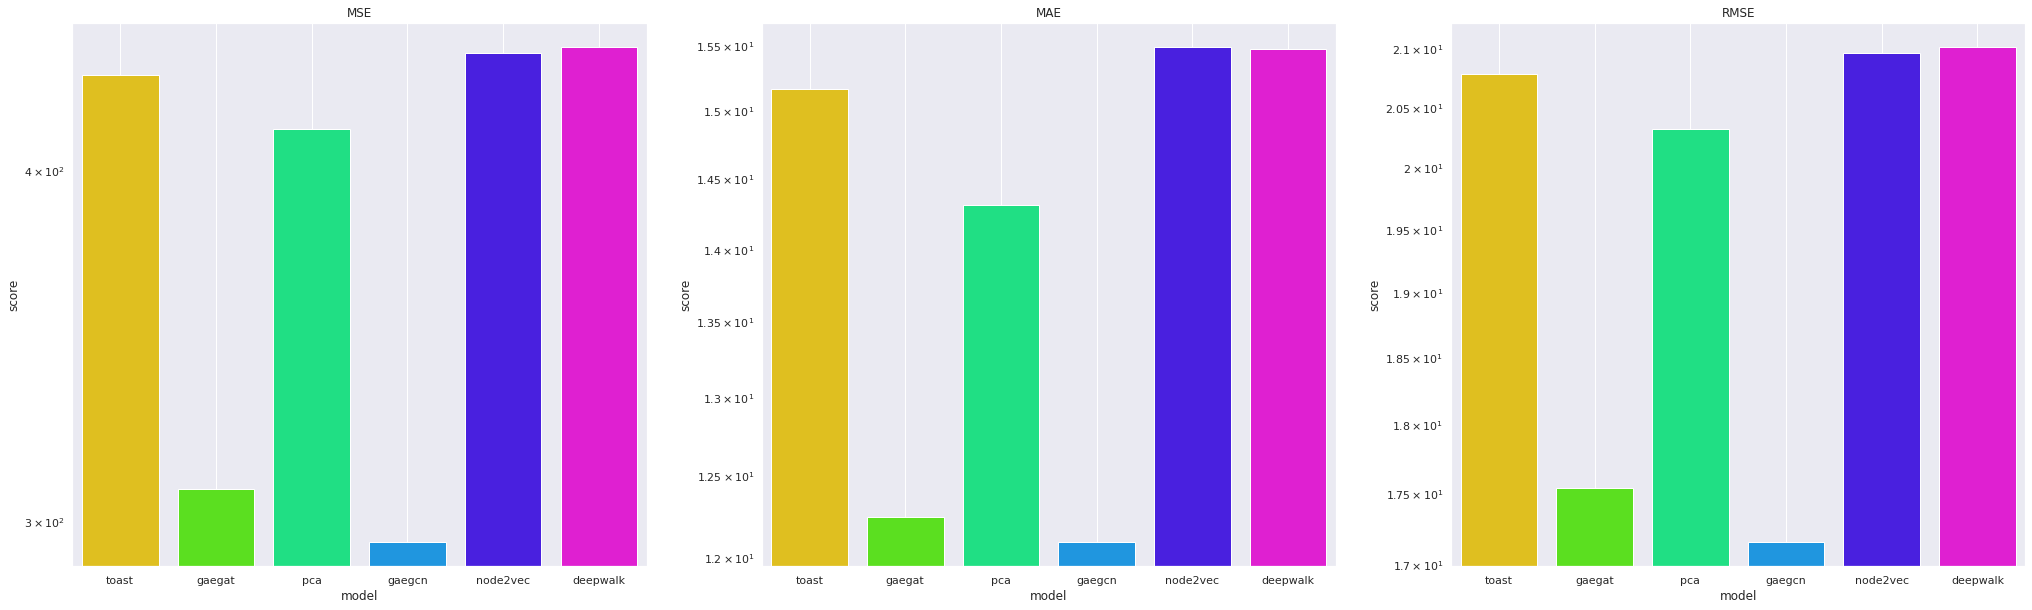

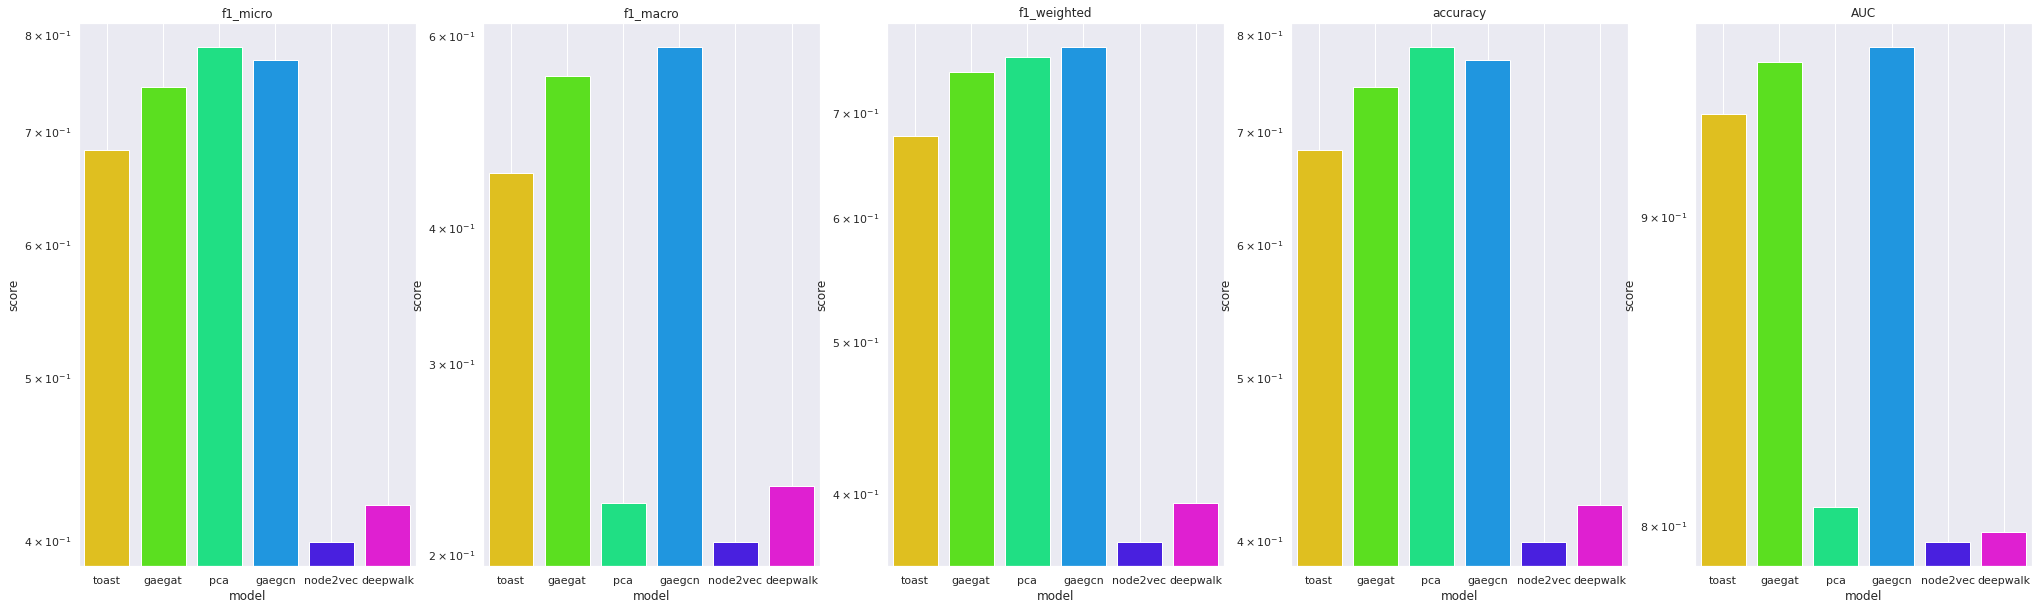

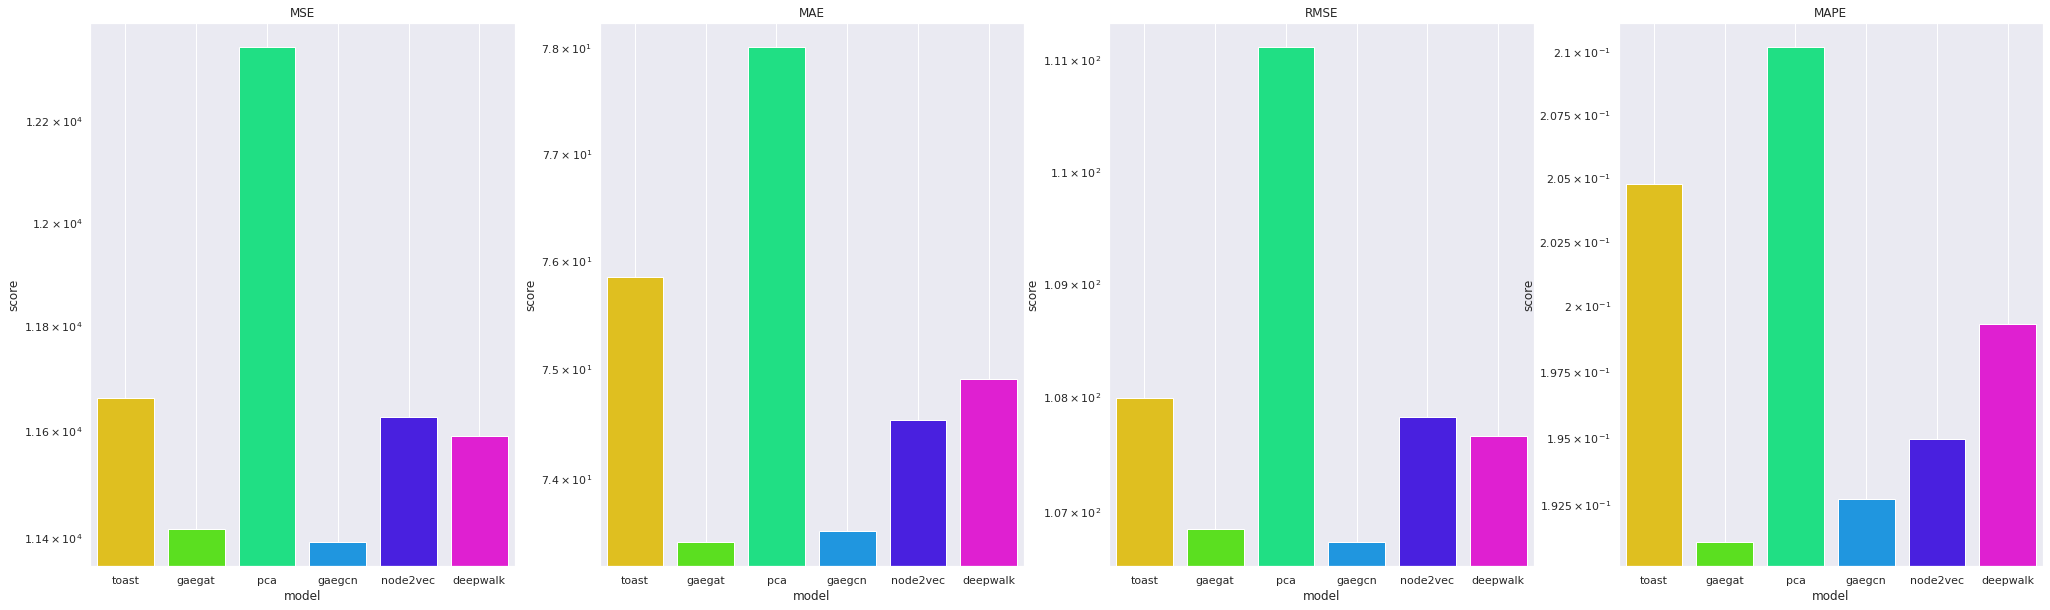

In [63]:
sns.set_style("darkgrid")

for df in dfs:
    # convert to barplot friendly format
    df = df.set_index("model").stack().reset_index().rename(columns={"level_1": "score_func", 0: "score"})
    score_funcs = df["score_func"].unique()
    fig, ax = plt.subplots(1, len(score_funcs), figsize=(35,10))
    for i, sf in enumerate(score_funcs):
        g = sns.barplot(
            data=df[df["score_func"]==sf], 
            x="model", y="score",
            ci="sd", palette="hsv", alpha=1, ax=ax[i]
        )
        g.set_yscale("log")
        g.set_title(sf)
        ax[i].grid()
        #g.despine(left=True)
        #g.set_axis_labels("score function", "score")

In [4]:
"""
Analysis of k-evaluation
"""
all_files = glob.glob(os.path.join("./results" , "gtn_k_eva/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    df["k"] = df['model'].str.split('_').str[2]
    df["type"] = df['model'].str.split('_').str[3]
    dfs.append(df)

./results/gtn_k_eva/roadclf.csv
./results/gtn_k_eva/traveltime_1.csv
./results/gtn_k_eva/traveltime_2.csv
./results/gtn_k_eva/traveltime.csv
./results/gtn_k_eva/meanspeed_1.csv
./results/gtn_k_eva/destination.csv
./results/gtn_k_eva/nextlocation.csv
./results/gtn_k_eva/meanspeed.csv


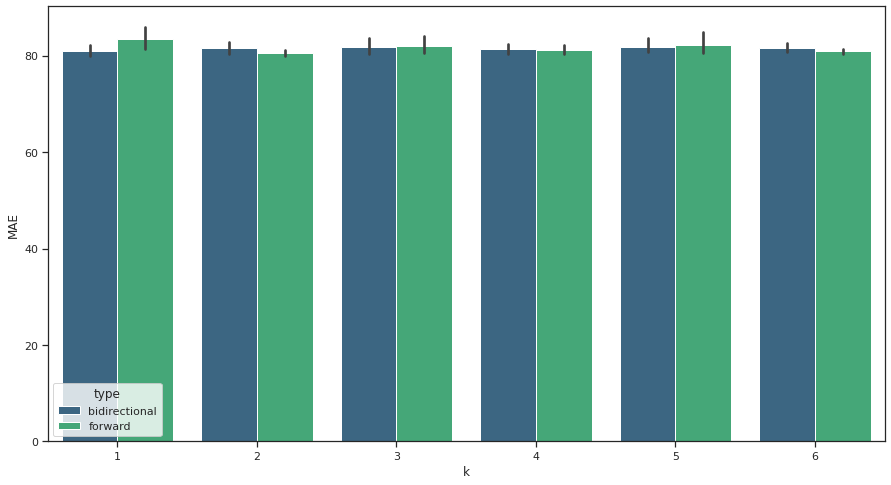

In [51]:
plt.figure(figsize=(15,8))

ax = sns.barplot(x="k", y="MAE", hue="type", data=dfs[4], palette="viridis")
#ax = sns.swarmplot(x="k", y="f1_macro", hue="type", data=dfs[1], palette="viridis")

In [7]:
v = dfs[5].groupby(["type", "k"])["accuracy"].agg(["mean", "var"]).reset_index()
v["mean"] = v["mean"].round(3)
print(v.to_latex())

\begin{tabular}{lllrr}
\toprule
{} &           type &  k &   mean &       var \\
\midrule
0  &  bidirectional &  1 &  0.213 &  0.000006 \\
1  &  bidirectional &  2 &  0.219 &  0.000015 \\
2  &  bidirectional &  3 &  0.222 &  0.000010 \\
3  &  bidirectional &  4 &  0.225 &  0.000013 \\
4  &  bidirectional &  5 &  0.226 &  0.000010 \\
5  &  bidirectional &  6 &  0.227 &  0.000010 \\
6  &        forward &  1 &  0.214 &  0.000004 \\
7  &        forward &  2 &  0.218 &  0.000020 \\
8  &        forward &  3 &  0.223 &  0.000024 \\
9  &        forward &  4 &  0.225 &  0.000005 \\
10 &        forward &  5 &  0.226 &  0.000009 \\
11 &        forward &  6 &  0.227 &  0.000015 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3863/4121118084.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(v.to_latex())
